In [1]:
import pandas as pd
import numpy as np 
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy.stats import chi2_contingency
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, levene
import warnings
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import kruskal
import scikit_posthocs as sp
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
df=pd.read_csv("Response (1).csv")

In [3]:
df

,Age(eg.21),Gender,Occupation,What is your personal monthly income?,Where do you reside?,Do you use UPI for transactions?,What are your reasons for not using UPI? (Select all that apply),How often do you use UPI for transactions?,Which UPI app have you been primarily using for the past 6 months?,"Do you use any other UPI apps for transactions besides your primary UPI app? If yes, please specify",...,How has your UPI app impacted your financial habits? (Rate the impact on each aspect) [Frequency of digital transactions],How has your UPI app impacted your financial habits? (Rate the impact on each aspect) [Ability to track expenses\t],How has your UPI app impacted your financial habits? (Rate the impact on each aspect) [Bill Payments & Subscription Management],How has your UPI app impacted your financial habits? (Rate the impact on each aspect) [Savings habits\t],How has your UPI app impacted your financial habits? (Rate the impact on each aspect) [Impulse buying behavior],How has your UPI app impacted your financial habits? (Rate the impact on each aspect) [Payment convenience at small/local merchant],"Do you use your UPI app for business-related transactions (e.g., receiving payments from clients)?",How often do you use UPI apps for payments at small/local merchants?,How satisfied are you with your primary UPI app overall ?,Would you recommend your UPI app to others ?
0,22.0,Male,Student,"Below ₹20,000",Urban,Yes,NaN,Daily,Google Pay,Google Pay;PhonePe,...,No Change,Moderately Increased,No Change,Moderately Increased,Significantly Increased,No Change,Yes,Frequently,4.0,9.0
1,22.0,Female,Student,"₹50,000 - ₹1,00,000",Semi urban,Yes,NaN,Daily,Google Pay,Google Pay,...,Moderately Increased,Significantly Increased,Moderately Increased,No Change,Moderately Increased,Significantly Increased,No,Frequently,4.0,9.0
2,22.0,Female,Student,"Below ₹20,000",Urban,Yes,NaN,Weekly,PhonePe,"No, I only use my primary UPI app",...,Moderately Increased,Moderately Increased,Moderately Increased,Significantly Increased,Moderately Increased,Moderately Increased,Yes,Frequently,5.0,9.0
3,22.0,Male,Student,"Below ₹20,000",Urban,Yes,NaN,Weekly,Google Pay,"No, I only use my primary UPI app",...,Significantly Increased,No Change,Moderately Declined,Moderately Declined,No Change,Moderately Increased,Yes,Occasionally,4.0,8.0
4,21.0,Male,Student,"₹50,000 - ₹1,00,000",Urban,No,Family doesn't allow me to use right now,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,25.0,Female,Salaried Professional,"₹20,000 - ₹50,000",Urban,Yes,NaN,Daily,Google Pay,Google Pay,...,Significantly Increased,Significantly Increased,Moderately Increased,Moderately Declined,Significantly Increased,No Change,Yes,Frequently,5.0,10.0
448,29.0,Male,Salaried Professional,"Above ₹1,00,000",Urban,Yes,NaN,Daily,Google Pay,PhonePe,...,Significantly Increased,Moderately Increased,Significantly Increased,Moderately Declined,Moderately Increased,Significantly Increased,No,Frequently,4.0,9.0
449,51.0,Male,Salaried Professional,"₹50,000 - ₹1,00,000",Urban,Yes,NaN,Daily,Google Pay,"No, I only use my primary UPI app",...,Significantly Increased,No Change,Significantly Increased,Moderately Declined,Moderately Increased,Significantly Increased,Yes,Frequently,5.0,10.0
450,25.0,Male,Business Owner,"₹20,000 - ₹50,000",Urban,Yes,NaN,Daily,Other,"Google Pay;No, I only use my primary UPI app",...,Significantly Increased,Significantly Declined,Moderately Increased,No Change,No Change,Moderately Declined,Yes,Frequently,4.0,10.0


In [4]:
df.drop(['What are your reasons for not using UPI? (Select all that apply)  ',],axis=1,inplace=True)

In [6]:
df.isnull().sum()

Age(eg.21)                                                                                                                                                 0
Gender                                                                                                                                                     0
Occupation                                                                                                                                                 0
What is your personal monthly income?                                                                                                                      0
Where do you reside?                                                                                                                                       0
Do you use UPI for transactions?                                                                                                                           0
How often do you use UPI for transactions?                

In [8]:
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

Age(eg.21)                                                                                                                                                0
Gender                                                                                                                                                    0
Occupation                                                                                                                                                0
What is your personal monthly income?                                                                                                                     0
Where do you reside?                                                                                                                                      0
Do you use UPI for transactions?                                                                                                                          0
How often do you use UPI for transactions?                      

In [10]:
df.shape

(422, 48)

In [11]:
df=df.rename(columns={'How satisfied are you with the following features of your UPI app?   [Transaction Speed\t]':"Transaction Speed satisfaction",
       'How satisfied are you with the following features of your UPI app?   [Bill Payment\t]':"Bill payemnt satisfaction",
       'How satisfied are you with the following features of your UPI app?   [Payment Reminders\t]':"Payment reminder satisfaction",
       'How satisfied are you with the following features of your UPI app?   [User Interface\t]':"User interface satisfaction",
       'How satisfied are you with the following features of your UPI app?   [Security Features]':"security feature satisfaction",
       'How satisfied are you with the following features of your UPI app?   [Coverage (Merchant & Bank Support)]':"Merchant & Bank Support satisafaction",
       'What types of transactions do you use your UPI app for? (Select frequency for each type) [Peer-to-peer transfers]':"Peer-to-peer transfers",
       'What types of transactions do you use your UPI app for? (Select frequency for each type) [Bill payments(e.g., electricity, water, gas, broadband)]':"Bill payment",
       'What types of transactions do you use your UPI app for? (Select frequency for each type) [Mobile recharges and DTH payments]':"Mobile recharges and DTH payments",
       'What types of transactions do you use your UPI app for? (Select frequency for each type) [Online shopping]':"online shopping",
       'What types of transactions do you use your UPI app for? (Select frequency for each type) [Ticket bookings (movies, flights, etc.)]':"Ticket bookings",
       'What types of transactions do you use your UPI app for? (Select frequency for each type) [Government-related payments (taxes, fines, etc.)]':"Government-related payments",
       'What types of transactions do you use your UPI app for? (Select frequency for each type) [Offline merchant payments]':"[Offline merchant payments",
       'What types of transactions do you use your UPI app for? (Select frequency for each type) [Loan or EMI Repayments]':"Loan or EMI Repayments",
       'What types of transactions do you use your UPI app for? (Select frequency for each type) [Donations]':"Donations",
       'What factors influence your choice of UPI app? (Rate the importance of each factor) [Transaction speed]':"Transaction speed",
       'What factors influence your choice of UPI app? (Rate the importance of each factor) [Security & Fraud Protection]':"Security & Fraud Protection",
       'What factors influence your choice of UPI app? (Rate the importance of each factor) [Cashback/Rewards]':"Cashback/Reward",
       'What factors influence your choice of UPI app? (Rate the importance of each factor) [Ease of use]':"Ease of use",
       'What factors influence your choice of UPI app? (Rate the importance of each factor) [Transaction limits (maximum transaction amount allowed)]':"Transaction limits",
       'What factors influence your choice of UPI app? (Rate the importance of each factor) [24/7 Customer Support Availability]':"24/7 Customer Support Availability",
       'What factors influence your choice of UPI app? (Rate the importance of each factor) [Payment Reminder Feature (Bills, Subscriptions, EMI, Rent, etc.)]':"Payment Reminder Feature",
       'What factors influence your choice of UPI app? (Rate the importance of each factor) [User interface & experience]':"User interface & experience",
       'What factors influence your choice of UPI app? (Rate the importance of each factor) [Ease of linking bank accounts]':"Ease of linking bank accounts",
       'How has your UPI app impacted your financial habits? (Rate the impact on each aspect)   [Dependency on cash/cards\t]':"Dependency on cash/cards",
       'How has your UPI app impacted your financial habits? (Rate the impact on each aspect)   [Frequency of digital transactions]':"Frequency of digital transactions",
       'How has your UPI app impacted your financial habits? (Rate the impact on each aspect)   [Ability to track expenses\t]':"Ability to track expenses",
       'How has your UPI app impacted your financial habits? (Rate the impact on each aspect)   [Bill Payments & Subscription Management]':"Bill Payments & Subscription Management habits",
       'How has your UPI app impacted your financial habits? (Rate the impact on each aspect)   [Savings habits\t]':"Savings habits",
       'How has your UPI app impacted your financial habits? (Rate the impact on each aspect)   [Impulse buying behavior]':"Impulse buying behavior",
       'How has your UPI app impacted your financial habits? (Rate the impact on each aspect)   [Payment convenience at small/local merchant]':"Payment convenience at small/local merchant"})
       

In [12]:
df.columns

Index(['Age(eg.21)', 'Gender', 'Occupation',
       'What is your personal monthly income?  ', 'Where do you reside? ',
       'Do you use UPI for transactions?  ',
       'How often do you use UPI for transactions? ',
       'Which UPI app have you been primarily using for the past 6 months?  ',
       'Do you use any other UPI apps for transactions besides your primary UPI app? If yes, please specify  ',
       'Transaction Speed satisfaction', 'Bill payemnt satisfaction',
       'Payment reminder satisfaction', 'User interface satisfaction',
       'security feature satisfaction',
       'Merchant & Bank Support satisafaction', 'Peer-to-peer transfers',
       'Bill payment', 'Mobile recharges and DTH payments', 'online shopping',
       'Ticket bookings', 'Government-related payments',
       '[Offline merchant payments', 'Loan or EMI Repayments', 'Donations',
       'What type of rewards or cashback offers do you find most attractive?  (Multiple choices)',
       'Which payment me

In [13]:
df["Which UPI app have you been primarily using for the past 6 months?  "].unique()

array(['Google Pay', 'PhonePe', 'Paytm', 'Other', 'Amazon Pay.', 'BHIM'],
      dtype=object)

In [14]:
df.dtypes

Age(eg.21)                                                                                               float64
Gender                                                                                                    object
Occupation                                                                                                object
What is your personal monthly income?                                                                     object
Where do you reside?                                                                                      object
Do you use UPI for transactions?                                                                          object
How often do you use UPI for transactions?                                                                object
Which UPI app have you been primarily using for the past 6 months?                                        object
Do you use any other UPI apps for transactions besides your primary UPI app? If yes, please spec

In [15]:
df['Age(eg.21)'] = pd.to_numeric(df['Age(eg.21)'], errors='coerce')
df['How satisfied are you with your primary UPI app overall ? '] = pd.to_numeric(df['How satisfied are you with your primary UPI app overall ? '], errors='coerce')
df['Would you recommend your UPI app to others ?'] = pd.to_numeric(df['Would you recommend your UPI app to others ?'], errors='coerce')

In [16]:
# Encode multiple columns
#Label encoding 
Le=LabelEncoder()
cols_to_encode = ['Gender', 'Occupation',
        'What is your personal monthly income?  ', 'Where do you reside? ',
       'Do you use UPI for transactions?  ',
       'How often do you use UPI for transactions? ',
       'Peer-to-peer transfers',
       'Bill payment', 'Mobile recharges and DTH payments',
       'online shopping', 'Ticket bookings', 'Government-related payments',
       '[Offline merchant payments', 'Loan or EMI Repayments', 'Donations',
       'What type of rewards or cashback offers do you find most attractive?  (Multiple choices)',
       'Which payment method do you use the most besides your UPI app? ',
       'Transaction speed', 'Security & Fraud Protection', 'Cashback/Reward',
       'Ease of use', 'Transaction limits',
       '24/7 Customer Support Availability', 'Payment Reminder Feature',
       'User interface & experience', 'Ease of linking bank accounts',
       'Have you ever hesitated to make a large transaction using UPI due to security concerns?  ',
       'What challenges do you face while using UPI apps?    ',
       'Dependency on cash/cards', 'Frequency of digital transactions',
       'Ability to track expenses',
       'Bill Payments & Subscription Management habits', 'Savings habits',
       'Impulse buying behavior',
       'Payment convenience at small/local merchant',
       'Do you use your UPI app for business-related transactions (e.g., receiving payments from clients)? ',
       'How often do you use UPI apps for payments at small/local merchants? ',]  # List of categorical columns

for col in cols_to_encode:
    df[col] = Le.fit_transform(df[col])  # Apply label encoding



In [17]:
#Ordinal encoding

In [18]:
satisfaction_mapping = {
    'Very Dissatisfied': 0,
    'Dissatisfied': 1,
    'Neutral': 2,
    'Satisfied': 3,
    'Very Satisfied': 4
}
columns_to_encode = [
    'Transaction Speed satisfaction', 
    'Bill payemnt satisfaction',
    'Payment reminder satisfaction', 
    'User interface satisfaction',
    'security feature satisfaction',
    'Merchant & Bank Support satisafaction'
]

for col in columns_to_encode:
    df[col] = df[col].map(satisfaction_mapping)

In [19]:
df.head

<bound method NDFrame.head of      Age(eg.21)  Gender  Occupation  What is your personal monthly income?    \
0          22.0       1           5                                        1   
1          22.0       0           5                                        3   
2          22.0       0           5                                        1   
3          22.0       1           5                                        1   
5          21.0       0           5                                        1   
..          ...     ...         ...                                      ...   
447        25.0       0           4                                        2   
448        29.0       1           4                                        0   
449        51.0       1           4                                        3   
450        25.0       1           0                                        2   
451        21.0       0           5                                        1   

     Wher

#Comparision bet difference based on there features 

In [20]:

warnings.filterwarnings('ignore')
categories = {
    "Transaction Speed": "Transaction Speed satisfaction",
    "Bill Payment": "Bill payemnt satisfaction",
    "Payment Reminder": "Payment reminder satisfaction",
    "User Interface": "User interface satisfaction",
    "Security Features": "security feature satisfaction",
    "Merchant & Bank Support": "Merchant & Bank Support satisafaction"
}

# UPI apps list
upi_apps = ['Google Pay', 'PhonePe', 'Paytm']

# ---- Normality Check (Shapiro-Wilk) ----
normality_results = []

for category, column in categories.items():
    for app in upi_apps:
        scores = df[df['Which UPI app have you been primarily using for the past 6 months?  '] == app][column].dropna()
        if len(scores) >= 3:
            stat, p = shapiro(scores)
            result = "Normal" if p > 0.05 else "Not Normal"
            p_formatted = f"{p:.3e}"  # scientific notation
            normality_results.append([category, app, f"{stat:.3f}", p_formatted, result])
        else:
            normality_results.append([category, app, "N/A", "N/A", "Not Enough Data"])

# Convert to DataFrame and display
normality_df = pd.DataFrame(normality_results, columns=["Category", "UPI App", "W-Statistic", "p-Value", "Interpretation"])
print("\n--- Shapiro-Wilk Normality Test Results ---")
print(normality_df.to_string(index=False))


# ---- Homogeneity of Variance Check (Levene's Test) ----
levene_results = []

for category, column in categories.items():
    google = df[df['Which UPI app have you been primarily using for the past 6 months?  '] == 'Google Pay'][column].dropna()
    phonepe = df[df['Which UPI app have you been primarily using for the past 6 months?  '] == 'PhonePe'][column].dropna()
    paytm = df[df['Which UPI app have you been primarily using for the past 6 months?  '] == 'Paytm'][column].dropna()

    if all(len(x) >= 3 for x in [google, phonepe, paytm]):
        stat, p = levene(google, phonepe, paytm)
        p_formatted = f"{p:.3e}"  # scientific notation
        interpretation = "Homogeneous" if p > 0.05 else "Not Homogeneous"
        levene_results.append([category, f"{stat:.3f}", p_formatted, interpretation])
    else:
        levene_results.append([category, "N/A", "N/A", "Not Enough Data"])

# Convert to DataFrame and display
levene_df = pd.DataFrame(levene_results, columns=["Category", "Levene Statistic", "p-Value", "Interpretation"])
print("\n--- Levene's Test for Homogeneity of Variance ---")
print(levene_df.to_string(index=False))



--- Shapiro-Wilk Normality Test Results ---
               Category    UPI App W-Statistic   p-Value Interpretation
      Transaction Speed Google Pay       0.780 2.937e-18     Not Normal
      Transaction Speed    PhonePe       0.726 8.343e-12     Not Normal
      Transaction Speed      Paytm       0.697 1.475e-07     Not Normal
           Bill Payment Google Pay       0.827 3.213e-16     Not Normal
           Bill Payment    PhonePe       0.752 3.716e-11     Not Normal
           Bill Payment      Paytm       0.666 4.881e-08     Not Normal
       Payment Reminder Google Pay       0.851 5.308e-15     Not Normal
       Payment Reminder    PhonePe       0.834 9.348e-09     Not Normal
       Payment Reminder      Paytm       0.821 2.849e-05     Not Normal
         User Interface Google Pay       0.840 1.453e-15     Not Normal
         User Interface    PhonePe       0.796 5.960e-10     Not Normal
         User Interface      Paytm       0.768 2.533e-06     Not Normal
      Security Feat

Anova & Tukey HSD

In [21]:
# Define the satisfaction categories and their respective column names
categories = {
    "Transaction Speed": "Transaction Speed satisfaction",
    "Bill Payment": "Bill payemnt satisfaction",
    "Payment Reminder": "Payment reminder satisfaction",
    "User Interface": "User interface satisfaction",
    "Security Features": "security feature satisfaction",
    "Merchant & Bank Support": "Merchant & Bank Support satisafaction"
}

# Define the UPI apps for comparison
upi_apps = ['Google Pay', 'PhonePe', 'Paytm']

# Store results in a list
results = []

# Perform ANOVA for each category
for category, column in categories.items():
    # Extract data for each app
    data_groups = [df[df['Which UPI app have you been primarily using for the past 6 months?  '] == app][column] for app in upi_apps]
    
    # Perform ANOVA
    f_stat, p_value = stats.f_oneway(*data_groups)
    
    # Determine significance
    significance = "Significant Difference" if p_value < 0.05 else "No Significant Difference"
    
    # Append results
    results.append([category, f"{f_stat:.4f}", f"{p_value:.4f}", significance])

# Convert results to DataFrame for table format
results_df = pd.DataFrame(results, columns=["Satisfaction Category", "F-Statistic", "P-Value", "Conclusion"])

# Display results
print(results_df)


     Satisfaction Category F-Statistic P-Value                 Conclusion
0        Transaction Speed      9.1374  0.0001     Significant Difference
1             Bill Payment     11.0283  0.0000     Significant Difference
2         Payment Reminder      2.9506  0.0535  No Significant Difference
3           User Interface      6.2937  0.0020     Significant Difference
4        Security Features      7.1949  0.0009     Significant Difference
5  Merchant & Bank Support     12.9570  0.0000     Significant Difference


In [22]:

# Define the satisfaction categories and their respective column names
categories = {
    "Transaction Speed": "Transaction Speed satisfaction",
    "Bill Payment": "Bill payemnt satisfaction",
    "Payment Reminder": "Payment reminder satisfaction",
    "User Interface": "User interface satisfaction",
    "Security Features": "security feature satisfaction",
    "Merchant & Bank Support": "Merchant & Bank Support satisafaction"
}

# Define the UPI apps for comparison
upi_apps = ['Google Pay', 'PhonePe', 'Paytm']

# Store results in a list
results = []

# Perform ANOVA and Tukey HSD for each category
for category, column in categories.items():
    # Filter out NaNs
    filtered_df = df[df[column].notna()]
    
    # Extract data for each app
    data_groups = [filtered_df[filtered_df['Which UPI app have you been primarily using for the past 6 months?  '] == app][column] for app in upi_apps]
    
    # Perform ANOVA
    f_stat, p_value = stats.f_oneway(*data_groups)
    significance = "Significant Difference" if p_value < 0.05 else "No Significant Difference"
    
    # Append ANOVA result
    results.append([category, f"{f_stat:.4f}", f"{p_value:.4f}", significance])
    
    # If significant, perform Tukey's HSD
    if p_value < 0.05:
        tukey = pairwise_tukeyhsd(
            endog=filtered_df[column],
            groups=filtered_df['Which UPI app have you been primarily using for the past 6 months?  '],
            alpha=0.05
        )
        print(f"\nTukey HSD for {category}:\n", tukey)

# Convert results to DataFrame for tabular display
results_df = pd.DataFrame(results, columns=["Satisfaction Category", "F-Statistic", "P-Value", "Conclusion"])

# Display the summary table
print("\n=== ANOVA Summary ===")
print(results_df)


Tukey HSD for Transaction Speed:
      Multiple Comparison of Means - Tukey HSD, FWER=0.05     
   group1     group2   meandiff p-adj   lower   upper  reject
-------------------------------------------------------------
Amazon Pay.       BHIM   1.7143 0.0777 -0.1047  3.5333  False
Amazon Pay. Google Pay   0.2299  0.992 -0.8966  1.3564  False
Amazon Pay.      Other   0.7143 0.7748  -0.837  2.2655  False
Amazon Pay.      Paytm   0.5038 0.8713 -0.7794  1.7869  False
Amazon Pay.    PhonePe   0.9752 0.1688 -0.2022  2.1526  False
       BHIM Google Pay  -1.4844 0.0472 -2.9579 -0.0108   True
       BHIM      Other     -1.0 0.6162  -2.819   0.819  False
       BHIM      Paytm  -1.2105 0.2537  -2.807   0.386  False
       BHIM    PhonePe  -0.7391 0.7278  -2.252  0.7737  False
 Google Pay      Other   0.4844 0.8214 -0.6421  1.6109  False
 Google Pay      Paytm   0.2738 0.8817 -0.4396  0.9873  False
 Google Pay    PhonePe   0.7452 0.0003  0.2464  1.2441   True
      Other      Paytm  -0.2105 0.9

In [ ]:
#Kruskal wallins and dunn test 

In [25]:
#FOR COMPARISION BET DIFFERENT APPS for How satisfied are you with your primary UPI app overall ?
# Perform ANOVA
f_stat, p_value = stats.f_oneway(df[df['Which UPI app have you been primarily using for the past 6 months?  '] == 'Google Pay']['How satisfied are you with your primary UPI app overall ? '],
                                 df[df['Which UPI app have you been primarily using for the past 6 months?  '] == 'PhonePe']['How satisfied are you with your primary UPI app overall ? '],
                                 df[df['Which UPI app have you been primarily using for the past 6 months?  '] == 'Paytm']['How satisfied are you with your primary UPI app overall ? '])

print(f"F-Statistic: {f_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

#If p-value < 0.05, we reject the null hypothesis → At least one UPI app is significantly different in terms of security rating.
#If p-value > 0.05, we fail to reject the null hypothesis → No significant difference between UPI apps.

F-Statistic: 0.8400
P-Value: 0.4325


Kruskal wallis and Dan test 

In [23]:
from scipy import stats
import pandas as pd

# Define the satisfaction categories and their respective column names
categories = {
    "Transaction Speed": "Transaction Speed satisfaction",
    "Bill Payment": "Bill payemnt satisfaction",
    "Payment Reminder": "Payment reminder satisfaction",
    "User Interface": "User interface satisfaction",
    "Security Features": "security feature satisfaction",
    "Merchant & Bank Support": "Merchant & Bank Support satisafaction"
}

# Define the UPI apps for comparison
upi_apps = ['Google Pay', 'PhonePe', 'Paytm']

# Store results in a list
results = []

# Perform Kruskal-Wallis test for each category
for category, column in categories.items():
    # Extract data for each app
    data_groups = [df[df['Which UPI app have you been primarily using for the past 6 months?  '] == app][column].dropna() for app in upi_apps]
    
    # Perform Kruskal-Wallis test
    h_stat, p_value = stats.kruskal(*data_groups)
    
    # Determine significance
    significance = "Significant Difference" if p_value < 0.05 else "No Significant Difference"
    
    # Append results
    results.append([category, f"{h_stat:.4f}", f"{p_value:.4f}", significance])

# Convert results to DataFrame for table format
results_df = pd.DataFrame(results, columns=["Satisfaction Category", "H-Statistic", "P-Value", "Conclusion"])

# Display results
print(results_df)


     Satisfaction Category H-Statistic P-Value                 Conclusion
0        Transaction Speed     11.2821  0.0035     Significant Difference
1             Bill Payment     15.5472  0.0004     Significant Difference
2         Payment Reminder      2.1335  0.3441  No Significant Difference
3           User Interface      6.5252  0.0383     Significant Difference
4        Security Features      9.4317  0.0090     Significant Difference
5  Merchant & Bank Support     21.8054  0.0000     Significant Difference


In [24]:

# Store Kruskal-Wallis results
kruskal_results = []

# Store Dunn's Test results
dunn_tables = {}

for category, column in categories.items():
    # Filter NaNs
    filtered_df = df[df[column].notna()]
    
    # Extract data
    data = filtered_df[[column, 'Which UPI app have you been primarily using for the past 6 months?  ']].dropna()
    
    # Perform Kruskal-Wallis H-test
    groups = [data[data['Which UPI app have you been primarily using for the past 6 months?  '] == app][column] for app in upi_apps]
    h_stat, p_value = stats.kruskal(*groups)
    significance = "Significant Difference" if p_value < 0.05 else "No Significant Difference"
    
    # Store Kruskal result
    kruskal_results.append([category, f"{h_stat:.4f}", f"{p_value:.4f}", significance])
    
    # If significant, perform Dunn's Test
    if p_value < 0.05:
        dunn_result = sp.posthoc_dunn(
            data,
            val_col=column,
            group_col='Which UPI app have you been primarily using for the past 6 months?  ',
            p_adjust='bonferroni'
        )
        
        # Convert to long format for clarity
        dunn_melted = dunn_result.reset_index().melt(id_vars='index')
        dunn_melted.columns = ['Group 1', 'Group 2', 'Adjusted p-value']
        dunn_melted = dunn_melted[dunn_melted['Group 1'] < dunn_melted['Group 2']]  # Avoid duplicate pairs
        
        # Store for display or export
        dunn_tables[category] = dunn_melted

# Display all results as tables
for category, table in dunn_tables.items():
    print(f"\nDunn's Test Result Table for {category} (Bonferroni-adjusted):")
    print(table.to_string(index=False))



Dunn's Test Result Table for Transaction Speed (Bonferroni-adjusted):
    Group 1    Group 2  Adjusted p-value
Amazon Pay.       BHIM          0.192665
Amazon Pay. Google Pay          1.000000
       BHIM Google Pay          0.011659
Amazon Pay.      Other          1.000000
       BHIM      Other          0.159248
 Google Pay      Other          1.000000
Amazon Pay.      Paytm          1.000000
       BHIM      Paytm          0.127513
 Google Pay      Paytm          1.000000
      Other      Paytm          1.000000
Amazon Pay.    PhonePe          1.000000
       BHIM    PhonePe          0.428574
 Google Pay    PhonePe          0.015156
      Other    PhonePe          1.000000
      Paytm    PhonePe          1.000000

Dunn's Test Result Table for Bill Payment (Bonferroni-adjusted):
    Group 1    Group 2  Adjusted p-value
Amazon Pay.       BHIM           1.00000
Amazon Pay. Google Pay           1.00000
       BHIM Google Pay           1.00000
Amazon Pay.      Other           1.00000
  

#cluster based on features 

In [27]:

# Step 1: Create a contingency table
contingency_table = pd.crosstab(df['Gender'], df['Do you use UPI for transactions?  '])

print("Contingency Table:")
print(contingency_table)

# Step 2: Perform Chi-square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Step 3: Output the results
print("\nChi-square Test Result:")
print(f"Chi2 Statistic: {chi2:.4f}")
print(f"Degrees of Freedom: {dof}")
print(f"P-value: {p:.4f}")

# Step 4: Conclusion
if p < 0.05:
    print("There is a significant association between Gender and UPI App Usage.")
else:
    print("There is no significant association between Gender and UPI App Usage.")


Contingency Table:
Do you use UPI for transactions?      0
Gender                                 
0                                   142
1                                   280

Chi-square Test Result:
Chi2 Statistic: 0.0000
Degrees of Freedom: 0
P-value: 1.0000
There is no significant association between Gender and UPI App Usage.


In [28]:
# Step 1: Clean and prepare age column

# Step 2: Define age bins and labels
age_bins = [0, 18, 25, 35, 50, 100]
age_labels = ['<18', '18-25', '26-35', '36-50', '50+']

# Step 3: Create 'Age Group' column
df['Age Group'] = pd.cut(df['Age(eg.21)'], bins=age_bins, labels=age_labels, right=False)

# Optional: Strip trailing spaces in UPI app column
df['Which UPI app have you been primarily using for the past 6 months?  '] = \
    df['Which UPI app have you been primarily using for the past 6 months?  '].str.strip()

# Step 4: Create the contingency table
contingency_table = pd.crosstab(df['Age Group'], df['Which UPI app have you been primarily using for the past 6 months?  '])

print("Contingency Table:")
print(contingency_table)

# Step 5: Perform the Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Step 6: Output results
print("\nChi-square Test Result:")
print(f"Chi2 Statistic: {chi2:.4f}")
print(f"Degrees of Freedom: {dof}")
print(f"P-value: {p:.4f}")

# Interpretation
if p < 0.05:
    print("There is a significant association between Age Group and UPI App Usage.")
else:
    print("There is no significant association between Age Group and UPI App Usage.")

Contingency Table:
Which UPI app have you been primarily using for the past 6 months?    Amazon Pay.  \
Age Group                                                                           
18-25                                                                          12   
26-35                                                                           0   
36-50                                                                           2   
50+                                                                             0   

Which UPI app have you been primarily using for the past 6 months?    BHIM  \
Age Group                                                                    
18-25                                                                    0   
26-35                                                                    4   
36-50                                                                    4   
50+                                                                      0   

W

In [29]:
# Step 3: Create the contingency table
contingency_table = pd.crosstab(df['Age Group'], df['Which UPI app have you been primarily using for the past 6 months?  '])

print("Contingency Table (UPI App Usage by Age Group):\n")
print(contingency_table.to_markdown())
percentage_table_columns = contingency_table.div(contingency_table.sum(axis=0), axis=1) * 100

# Optional: Round percentages for clarity
percentage_table_columns = percentage_table_columns.round(2)

# Step 5: Print the column-wise percentage table in Markdown format
print("\nContingency Table (Column-wise Percentages):\n")
print(percentage_table_columns.to_markdown())

Contingency Table (UPI App Usage by Age Group):

| Age Group   |   Amazon Pay. |   BHIM |   Google Pay |   Other |   Paytm |   PhonePe |
|:------------|--------------:|-------:|-------------:|--------:|--------:|----------:|
| 18-25       |            12 |      0 |          162 |       4 |      14 |        38 |
| 26-35       |             0 |      4 |           64 |       8 |      10 |        38 |
| 36-50       |             2 |      4 |           22 |       2 |      12 |        16 |
| 50+         |             0 |      0 |            8 |       0 |       2 |         0 |

Contingency Table (Column-wise Percentages):

| Age Group   |   Amazon Pay. |   BHIM |   Google Pay |   Other |   Paytm |   PhonePe |
|:------------|--------------:|-------:|-------------:|--------:|--------:|----------:|
| 18-25       |         85.71 |      0 |        63.28 |   28.57 |   36.84 |     41.3  |
| 26-35       |          0    |     50 |        25    |   57.14 |   26.32 |     41.3  |
| 36-50       |         

In [30]:
# Step 4: Create the contingency table
contingency_table = pd.crosstab(df["Gender"], df['Which UPI app have you been primarily using for the past 6 months?  '])

print("Contingency Table:")
print(contingency_table)

# Step 5: Perform the Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Step 6: Output results
print("\nChi-square Test Result:")
print(f"Chi2 Statistic: {chi2:.4f}")
print(f"Degrees of Freedom: {dof}")
print(f"P-value: {p:.4f}")

# Interpretation
if p < 0.05:
    print("There is a significant association between Gender and UPI App Usage.")
else:
    print("There is no significant association between Gender and UPI App Usage.")

Contingency Table:
Which UPI app have you been primarily using for the past 6 months?    Amazon Pay.  \
Gender                                                                              
0                                                                               0   
1                                                                              14   

Which UPI app have you been primarily using for the past 6 months?    BHIM  \
Gender                                                                       
0                                                                        0   
1                                                                        8   

Which UPI app have you been primarily using for the past 6 months?    Google Pay  \
Gender                                                                             
0                                                                             96   
1                                                                          

In [31]:
# Step 3: Create the contingency table
contingency_table = pd.crosstab(df['Gender'], df['Which UPI app have you been primarily using for the past 6 months?  '])

print("Contingency Table (UPI App Usage by Gender):\n")
print(contingency_table.to_markdown())
percentage_table_columns = contingency_table.div(contingency_table.sum(axis=0), axis=1) * 100

# Optional: Round percentages for clarity
percentage_table_columns = percentage_table_columns.round(2)

# Step 5: Print the column-wise percentage table in Markdown format
print("\nContingency Table (Column-wise Percentages):\n")
print(percentage_table_columns.to_markdown())

Contingency Table (UPI App Usage by Gender):

|   Gender |   Amazon Pay. |   BHIM |   Google Pay |   Other |   Paytm |   PhonePe |
|---------:|--------------:|-------:|-------------:|--------:|--------:|----------:|
|        0 |             0 |      0 |           96 |       0 |       8 |        38 |
|        1 |            14 |      8 |          160 |      14 |      30 |        54 |

Contingency Table (Column-wise Percentages):

|   Gender |   Amazon Pay. |   BHIM |   Google Pay |   Other |   Paytm |   PhonePe |
|---------:|--------------:|-------:|-------------:|--------:|--------:|----------:|
|        0 |             0 |      0 |         37.5 |       0 |   21.05 |      41.3 |
|        1 |           100 |    100 |         62.5 |     100 |   78.95 |      58.7 |


In [32]:
contingency_table = pd.crosstab(df['Occupation'], df['Which UPI app have you been primarily using for the past 6 months?  '])

print("Contingency Table (UPI App Usage by Occupation):\n")
print(contingency_table.to_markdown())
percentage_table_columns = contingency_table.div(contingency_table.sum(axis=0), axis=1) * 100

# Optional: Round percentages for clarity
percentage_table_columns = percentage_table_columns.round(2)

# Step 5: Print the column-wise percentage table in Markdown format
print("\nContingency Table (Column-wise Percentages):\n")
print(percentage_table_columns.to_markdown())

Contingency Table (UPI App Usage by Occupation):

|   Occupation |   Amazon Pay. |   BHIM |   Google Pay |   Other |   Paytm |   PhonePe |
|-------------:|--------------:|-------:|-------------:|--------:|--------:|----------:|
|            0 |             0 |      2 |           14 |       4 |      16 |         6 |
|            1 |             0 |      0 |           18 |       0 |       0 |         8 |
|            2 |             0 |      6 |           12 |       0 |       4 |         8 |
|            3 |             0 |      0 |            2 |       0 |       0 |         0 |
|            4 |            10 |      0 |          108 |       8 |      10 |        44 |
|            5 |             4 |      0 |          102 |       2 |       8 |        26 |

Contingency Table (Column-wise Percentages):

|   Occupation |   Amazon Pay. |   BHIM |   Google Pay |   Other |   Paytm |   PhonePe |
|-------------:|--------------:|-------:|-------------:|--------:|--------:|----------:|
|            

In [33]:
# Step 4: Create the contingency table
contingency_table = pd.crosstab(df["Occupation"], df['Which UPI app have you been primarily using for the past 6 months?  '])

print("Contingency Table:")
print(contingency_table)

# Step 5: Perform the Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Step 6: Output results
print("\nChi-square Test Result:")
print(f"Chi2 Statistic: {chi2:.4f}")
print(f"Degrees of Freedom: {dof}")
print(f"P-value: {p:.4f}")

# Interpretation
if p < 0.05:
    print("✅ There is a significant association between Occupation and UPI App Usage.")
else:
    print("❌ There is no significant association between Occupation and UPI App Usage.")

Contingency Table:
Which UPI app have you been primarily using for the past 6 months?    Amazon Pay.  \
Occupation                                                                          
0                                                                               0   
1                                                                               0   
2                                                                               0   
3                                                                               0   
4                                                                              10   
5                                                                               4   

Which UPI app have you been primarily using for the past 6 months?    BHIM  \
Occupation                                                                   
0                                                                        2   
1                                                                 

In [34]:
contingency_table = pd.crosstab(df['Occupation'], df['Which UPI app have you been primarily using for the past 6 months?  '])

print("Contingency Table (UPI App Usage by Occupation):\n")
print(contingency_table.to_markdown())
percentage_table_columns = contingency_table.div(contingency_table.sum(axis=0), axis=1) * 100

# Optional: Round percentages for clarity
percentage_table_columns = percentage_table_columns.round(2)

# Step 5: Print the column-wise percentage table in Markdown format
print("\nContingency Table (Column-wise Percentages):\n")
print(percentage_table_columns.to_markdown())

Contingency Table (UPI App Usage by Occupation):

|   Occupation |   Amazon Pay. |   BHIM |   Google Pay |   Other |   Paytm |   PhonePe |
|-------------:|--------------:|-------:|-------------:|--------:|--------:|----------:|
|            0 |             0 |      2 |           14 |       4 |      16 |         6 |
|            1 |             0 |      0 |           18 |       0 |       0 |         8 |
|            2 |             0 |      6 |           12 |       0 |       4 |         8 |
|            3 |             0 |      0 |            2 |       0 |       0 |         0 |
|            4 |            10 |      0 |          108 |       8 |      10 |        44 |
|            5 |             4 |      0 |          102 |       2 |       8 |        26 |

Contingency Table (Column-wise Percentages):

|   Occupation |   Amazon Pay. |   BHIM |   Google Pay |   Other |   Paytm |   PhonePe |
|-------------:|--------------:|-------:|-------------:|--------:|--------:|----------:|
|            

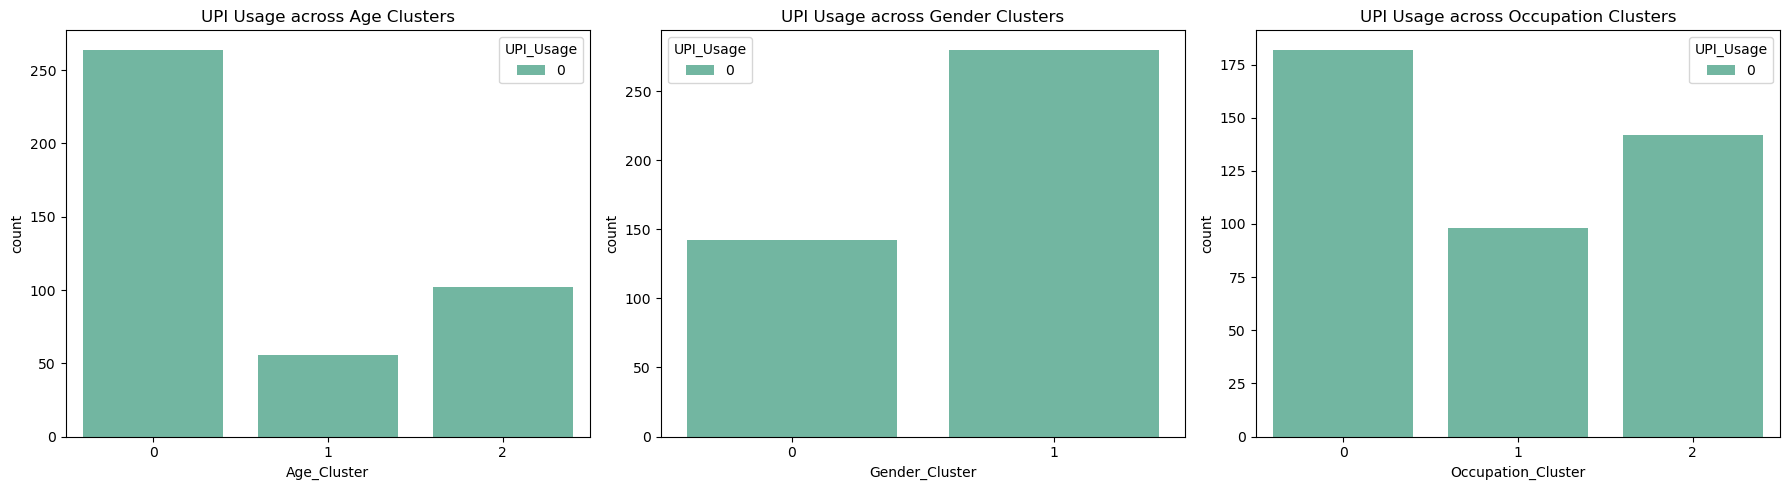

In [35]:

# Rename relevant columns
df1 = df.rename(columns={
    "Age(eg.21)": "Age",
    "Gender": "Gender",
    "Occupation": "Occupation",
    'Do you use UPI for transactions?  ': "UPI_Usage"
})

# Impute categorical columns with mode
for col in ["Gender", "Occupation"]:
    df1[col].fillna(df1[col].mode()[0], inplace=True)

# Drop rows with any remaining missing values (especially in Age or UPI_Usage)
df1.dropna(subset=["Age", "Gender", "Occupation", "UPI_Usage"], inplace=True)

# Encode categorical variables
le_gender = LabelEncoder()
le_occ = LabelEncoder()
le_upi = LabelEncoder()
df1["Gender_enc"] = le_gender.fit_transform(df1["Gender"])
df1["Occupation_enc"] = le_occ.fit_transform(df1["Occupation"])
df1["UPI_Usage_enc"] = le_upi.fit_transform(df1["UPI_Usage"])

# --- Clustering by Age ---
age_data = df1[["Age"]]
df1["Age_Cluster"] = KMeans(n_clusters=3, random_state=0).fit_predict(age_data)

# --- Clustering by Gender ---
gender_data = df1[["Gender_enc"]]
df1["Gender_Cluster"] = KMeans(n_clusters=2, random_state=0).fit_predict(gender_data)

# --- Clustering by Occupation ---
occ_data = df1[["Occupation_enc"]]
df1["Occupation_Cluster"] = KMeans(n_clusters=3, random_state=0).fit_predict(occ_data)

# --- Visualization ---
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Age cluster vs UPI usage
sns.countplot(data=df1, x="Age_Cluster", hue="UPI_Usage", ax=axes[0], palette="Set2")
axes[0].set_title("UPI Usage across Age Clusters")

# Gender cluster vs UPI usage
sns.countplot(data=df1, x="Gender_Cluster", hue="UPI_Usage", ax=axes[1], palette="Set2")
axes[1].set_title("UPI Usage across Gender Clusters")

# Occupation cluster vs UPI usage
sns.countplot(data=df1, x="Occupation_Cluster", hue="UPI_Usage", ax=axes[2], palette="Set2")
axes[2].set_title("UPI Usage across Occupation Clusters")

plt.tight_layout()
plt.show()


In [36]:
df=df.drop('Age Group',axis=1)

In [37]:
df['Which UPI app have you been primarily using for the past 6 months?  '] = Le.fit_transform(df['Which UPI app have you been primarily using for the past 6 months?  '])
df['Do you use any other UPI apps for transactions besides your primary UPI app? If yes, please specify  '] = Le.fit_transform(df['Do you use any other UPI apps for transactions besides your primary UPI app? If yes, please specify  '])


In [38]:
df.corr().to_csv("corr_metrix.csv",index=False)

In [39]:
df_cor=df[['Transaction Speed satisfaction', 'Bill payemnt satisfaction',
       'Payment reminder satisfaction', 'User interface satisfaction',
       'security feature satisfaction',
       'Merchant & Bank Support satisafaction', 'Peer-to-peer transfers',
       'Bill payment', 'Mobile recharges and DTH payments', 'online shopping',
       'Ticket bookings', 'Government-related payments',
       '[Offline merchant payments', 'Loan or EMI Repayments', 'Donations',
       'What type of rewards or cashback offers do you find most attractive?  (Multiple choices)',
       'Which payment method do you use the most besides your UPI app? ',
       'Transaction speed', 'Security & Fraud Protection', 'Cashback/Reward',
       'Ease of use', 'Transaction limits',
       '24/7 Customer Support Availability', 'Payment Reminder Feature',
       'User interface & experience', 'Ease of linking bank accounts',
       'Have you ever hesitated to make a large transaction using UPI due to security concerns?  ',
       'What challenges do you face while using UPI apps?    ',
       'Dependency on cash/cards', 'Frequency of digital transactions',
       'Ability to track expenses',
       'Bill Payments & Subscription Management habits', 'Savings habits',
       'Impulse buying behavior',
       'Payment convenience at small/local merchant',
       'Do you use your UPI app for business-related transactions (e.g., receiving payments from clients)? ',
       'How often do you use UPI apps for payments at small/local merchants? ',
       'How satisfied are you with your primary UPI app overall ? ',
       'Would you recommend your UPI app to others ?']]

In [40]:
df_cor.corr()

,Transaction Speed satisfaction,Bill payemnt satisfaction,Payment reminder satisfaction,User interface satisfaction,security feature satisfaction,Merchant & Bank Support satisafaction,Peer-to-peer transfers,Bill payment,Mobile recharges and DTH payments,online shopping,...,Frequency of digital transactions,Ability to track expenses,Bill Payments & Subscription Management habits,Savings habits,Impulse buying behavior,Payment convenience at small/local merchant,"Do you use your UPI app for business-related transactions (e.g., receiving payments from clients)?",How often do you use UPI apps for payments at small/local merchants?,How satisfied are you with your primary UPI app overall ?,Would you recommend your UPI app to others ?
Transaction Speed satisfaction,1.000000,0.903684,0.769053,0.845011,0.840019,0.801394,0.072638,-0.056424,0.049356,0.046602,...,0.251619,0.063361,0.035994,-0.083640,0.079690,0.069412,-0.077334,0.027829,0.342979,0.407546
Bill payemnt satisfaction,0.903684,1.000000,0.774073,0.833892,0.843609,0.795783,0.077088,-0.081153,0.082177,0.041095,...,0.308048,0.114308,0.064979,-0.060198,0.076461,0.116792,-0.093160,0.009203,0.338799,0.353635
Payment reminder satisfaction,0.769053,0.774073,1.000000,0.795492,0.778068,0.713064,0.044374,0.027019,0.001267,0.000574,...,0.209099,0.142511,-0.008113,0.061594,0.143562,-0.014205,-0.071619,0.027155,0.337583,0.317357
User interface satisfaction,0.845011,0.833892,0.795492,1.000000,0.873192,0.829210,0.062010,0.026297,0.015750,0.050212,...,0.184259,0.081308,-0.000581,-0.011692,0.082202,0.034256,-0.057079,0.065813,0.386826,0.411313
security feature satisfaction,0.840019,0.843609,0.778068,0.873192,1.000000,0.856437,0.040145,-0.012835,0.018058,0.048360,...,0.220085,0.097196,-0.022325,-0.024533,0.051074,0.019044,-0.104401,0.054819,0.308656,0.323111
Merchant & Bank Support satisafaction,0.801394,0.795783,0.713064,0.829210,0.856437,1.000000,0.008364,-0.002522,0.079994,-0.023486,...,0.155126,0.063792,-0.069576,-0.019467,0.062108,-0.008733,-0.066966,-0.022449,0.348027,0.374550
Peer-to-peer transfers,0.072638,0.077088,0.044374,0.062010,0.040145,0.008364,1.000000,0.183296,-0.021240,0.090073,...,-0.175691,-0.167583,0.001976,-0.005240,-0.099454,-0.159947,-0.001142,0.263973,0.071775,0.012726
Bill payment,-0.056424,-0.081153,0.027019,0.026297,-0.012835,-0.002522,0.183296,1.000000,0.262406,-0.047722,...,-0.149969,-0.180741,-0.245401,-0.000702,-0.078945,-0.176763,-0.158266,0.077087,0.024396,0.080394
Mobile recharges and DTH payments,0.049356,0.082177,0.001267,0.015750,0.018058,0.079994,-0.021240,0.262406,1.000000,0.142691,...,-0.038950,-0.134686,-0.091783,-0.124586,-0.101385,-0.023452,-0.169499,0.025157,0.002568,-0.055954
online shopping,0.046602,0.041095,0.000574,0.050212,0.048360,-0.023486,0.090073,-0.047722,0.142691,1.000000,...,-0.056734,0.044684,-0.045175,0.003383,-0.028694,0.067817,-0.111116,0.044855,-0.076809,-0.116598


<Axes: >

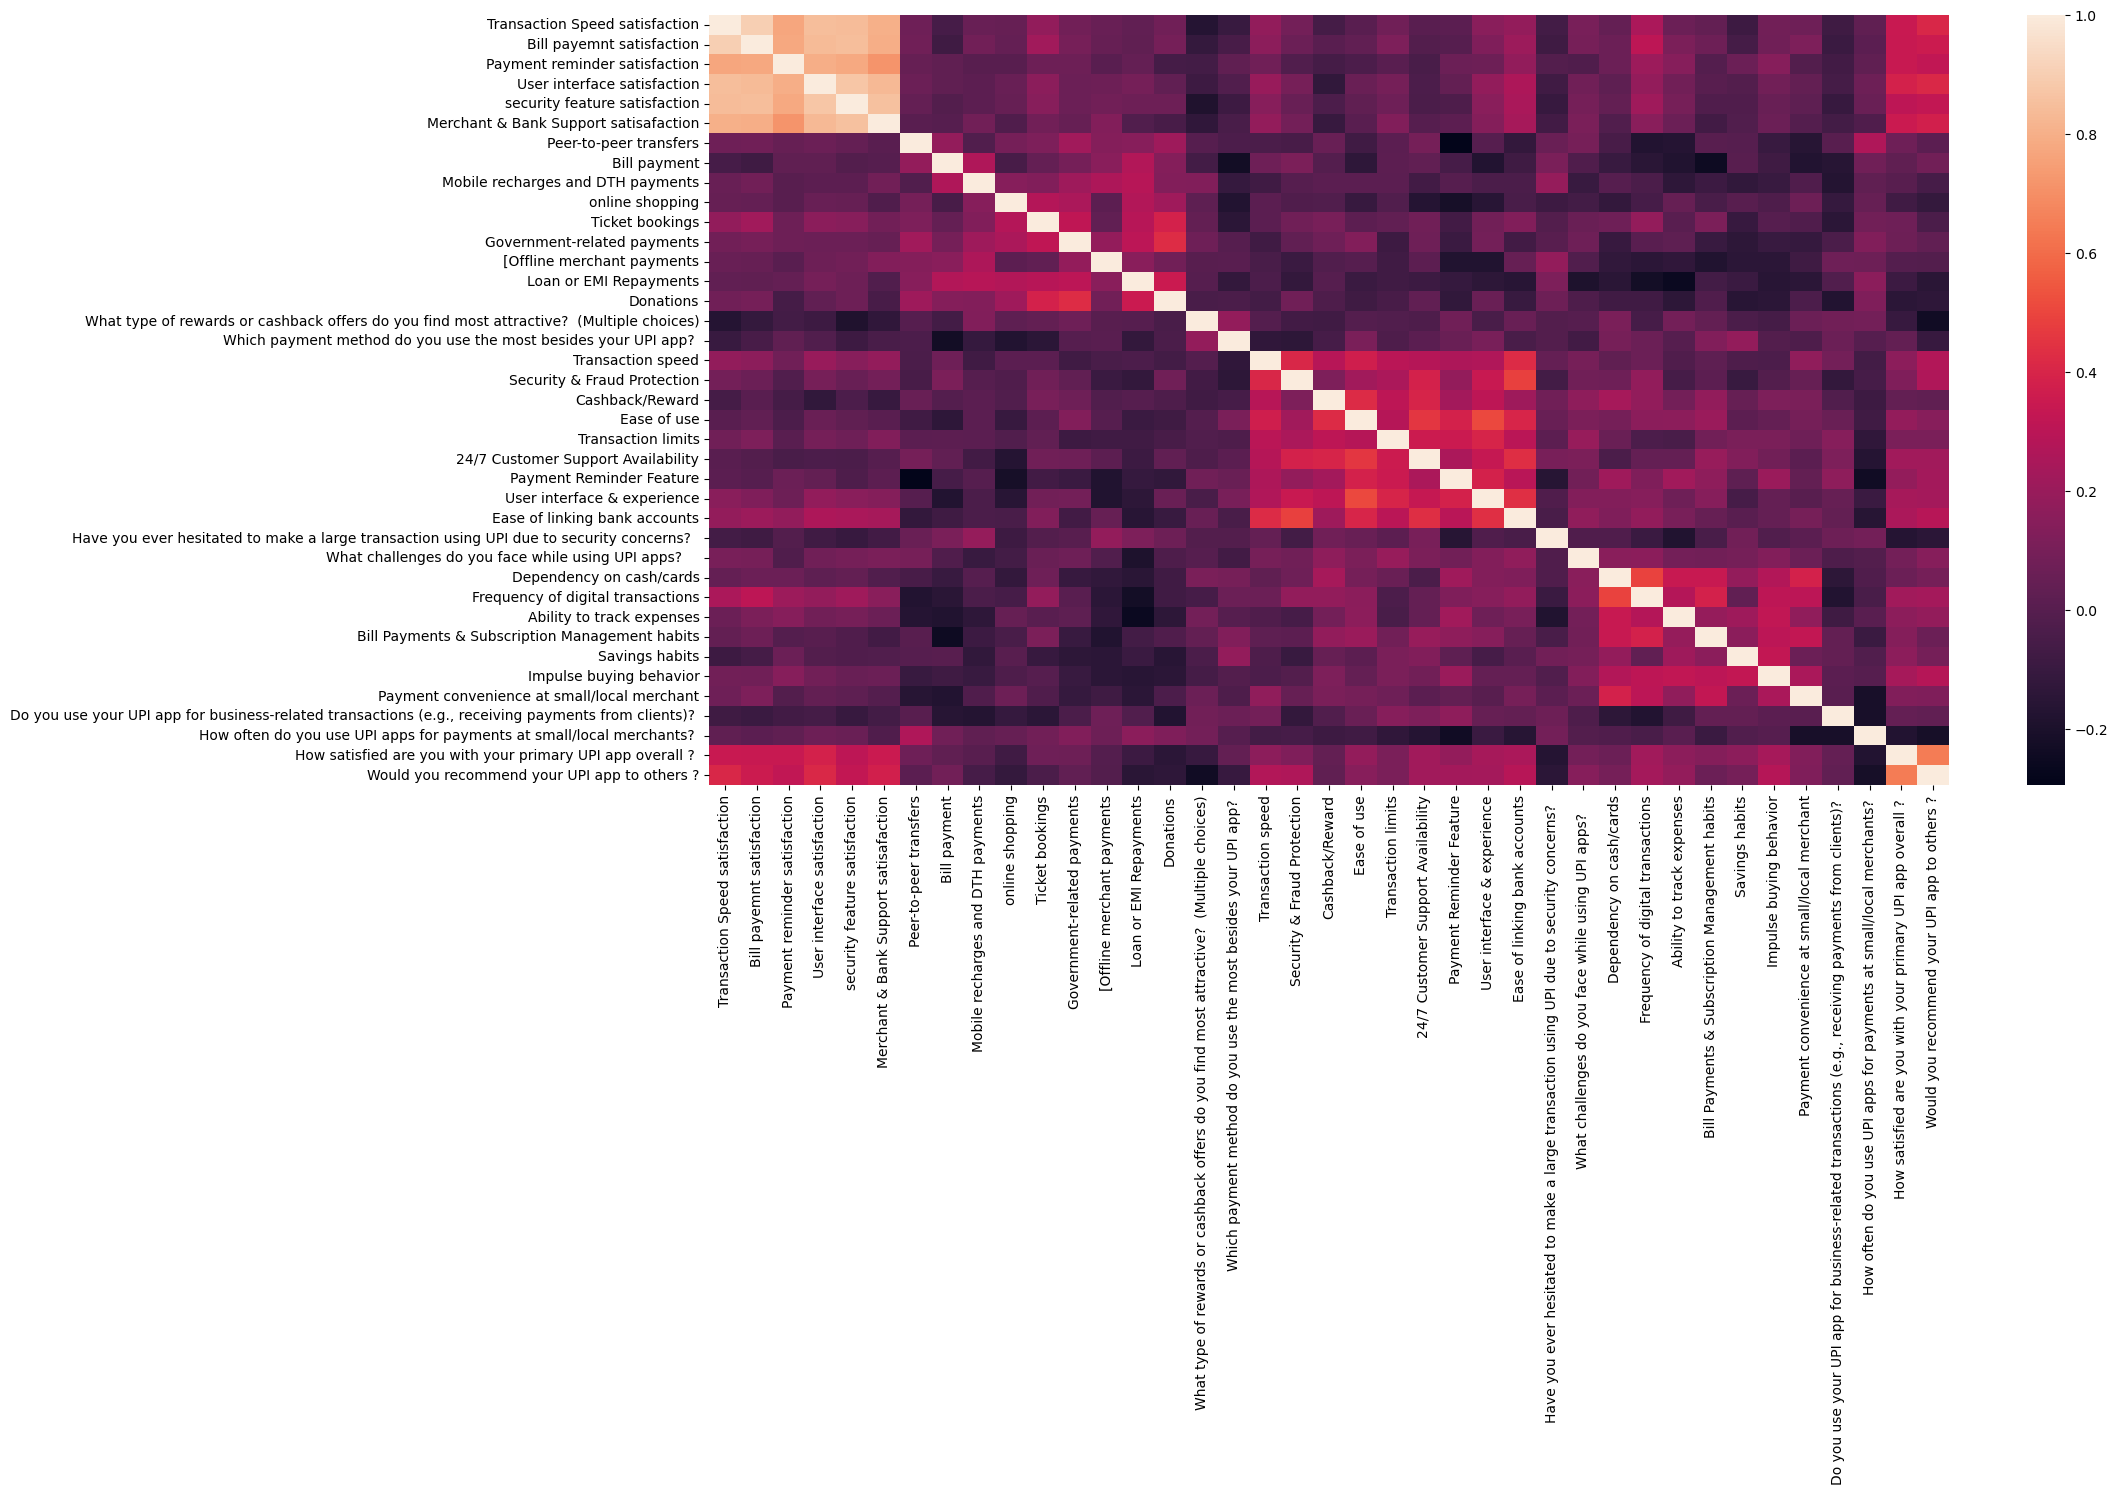

In [41]:
plt.figure(figsize=(20,10))
c= df_cor.corr()
sns.heatmap(c)

In [42]:
df2=df.copy()

In [43]:
df2.columns

Index(['Age(eg.21)', 'Gender', 'Occupation',
       'What is your personal monthly income?  ', 'Where do you reside? ',
       'Do you use UPI for transactions?  ',
       'How often do you use UPI for transactions? ',
       'Which UPI app have you been primarily using for the past 6 months?  ',
       'Do you use any other UPI apps for transactions besides your primary UPI app? If yes, please specify  ',
       'Transaction Speed satisfaction', 'Bill payemnt satisfaction',
       'Payment reminder satisfaction', 'User interface satisfaction',
       'security feature satisfaction',
       'Merchant & Bank Support satisafaction', 'Peer-to-peer transfers',
       'Bill payment', 'Mobile recharges and DTH payments', 'online shopping',
       'Ticket bookings', 'Government-related payments',
       '[Offline merchant payments', 'Loan or EMI Repayments', 'Donations',
       'What type of rewards or cashback offers do you find most attractive?  (Multiple choices)',
       'Which payment me

In [44]:
df2.drop([
    'Do you use UPI for transactions?  ',
    'How satisfied are you with your primary UPI app overall ? ',
    'Would you recommend your UPI app to others ?'
], axis=1, errors='ignore', inplace=True)

In [45]:
df2 = df2.dropna()

In [46]:
data=df2[['Transaction speed',
       'Security & Fraud Protection', 'Cashback/Reward', 'Ease of use',
       'Transaction limits', '24/7 Customer Support Availability',
       'Payment Reminder Feature', 'User interface & experience',
       'Ease of linking bank accounts',
       'Dependency on cash/cards', 'Frequency of digital transactions',
       'Ability to track expenses',
       'Bill Payments & Subscription Management habits', 'Savings habits',
       'Impulse buying behavior',
       'Payment convenience at small/local merchant']]

In [47]:
#Bartlett test 
chi_square_value, p_value=calculate_bartlett_sphericity(data)
print("Chi Square Value, P Values=",chi_square_value,p_value)

Chi Square Value, P Values= 1765.3778191964466 2.2065462731778575e-290


In [48]:
#KMO test 
kmo_all,kmo_model=calculate_kmo(data)
print('kmo_value=',kmo_model,"\n",f"KMO of all variables={kmo_all}") # kmo_value is greater then 0.5 it is acceptable

kmo_value= 0.7709830058522926 
 KMO of all variables=[0.78248797 0.7360053  0.76201189 0.81921939 0.8132596  0.75620104
 0.80542149 0.83358114 0.85072243 0.69442297 0.74636862 0.76919613
 0.78308203 0.53674978 0.73990407 0.69515691]


<Axes: >

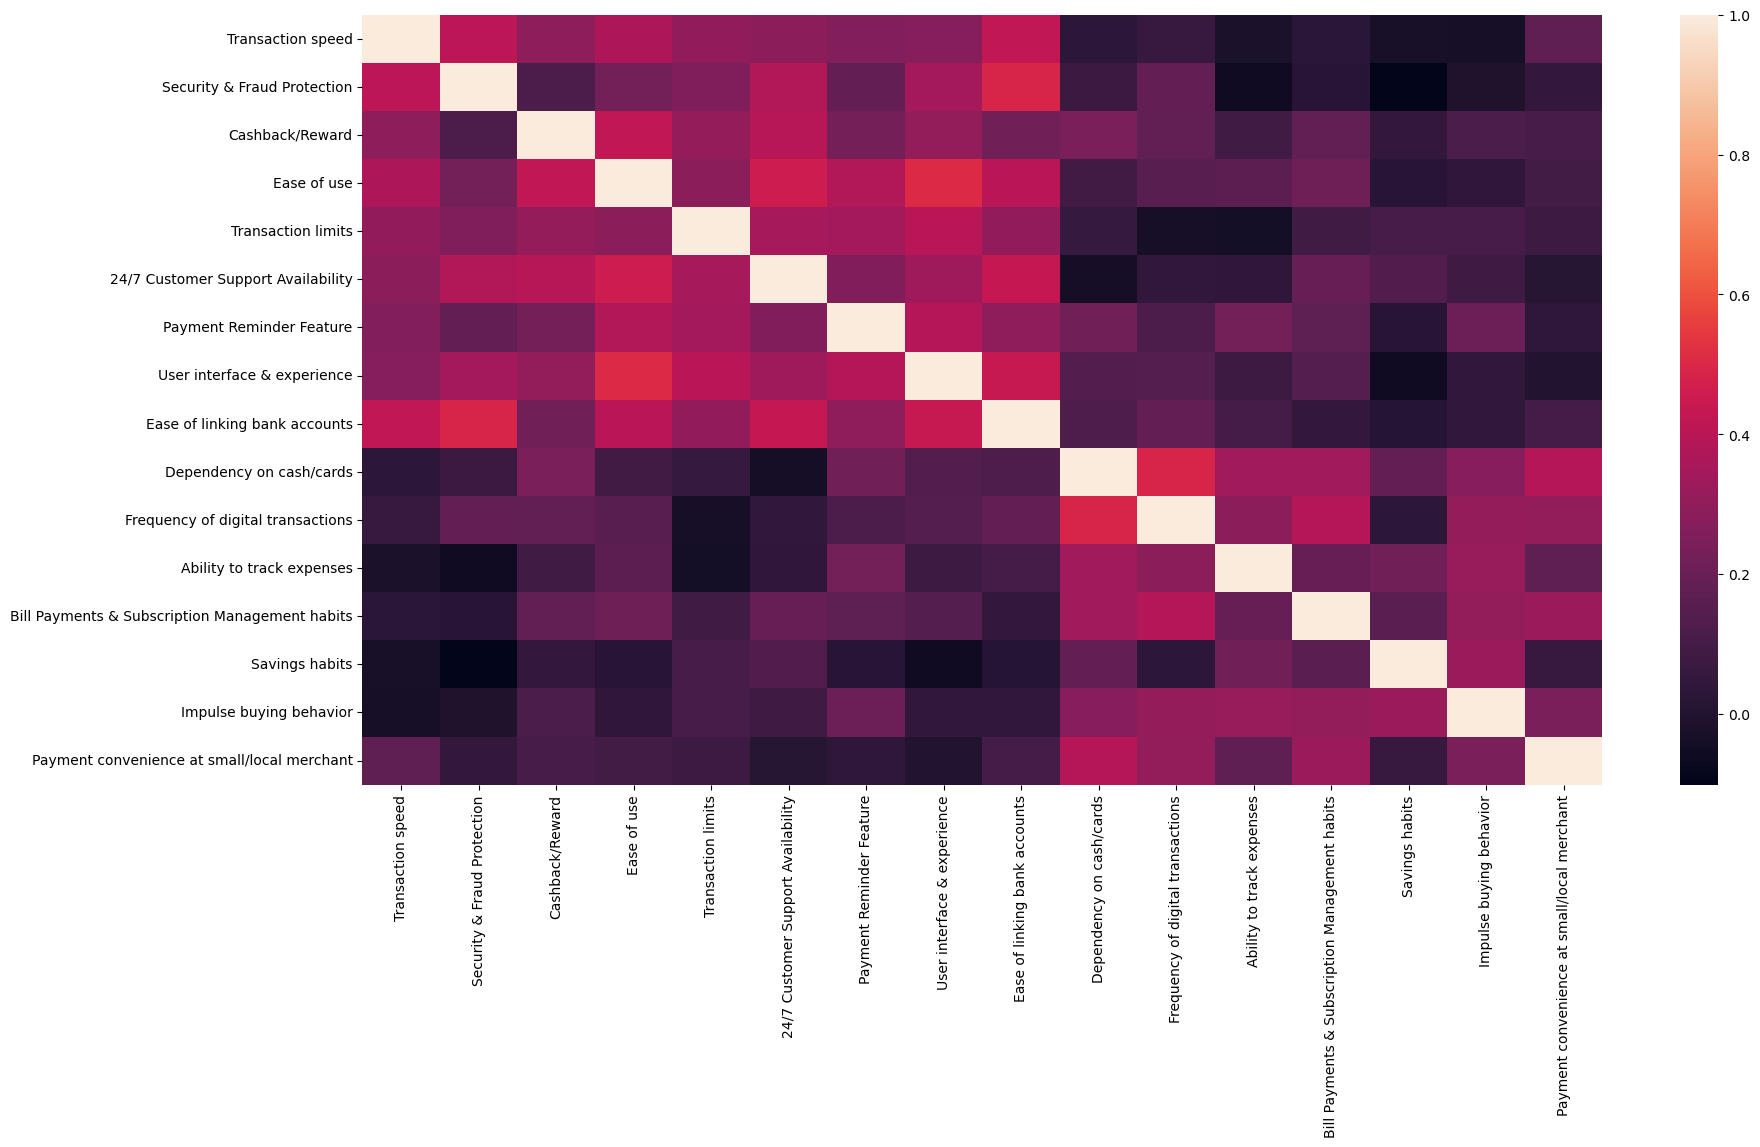

In [49]:
plt.figure(figsize=(20,10))
c= data.corr()
sns.heatmap(c)

kaiser rule

In [50]:
fa=FactorAnalyzer(rotation=None)
fa.fit(data)
ev,v=fa.get_eigenvalues()
ev


array([4.02891483, 2.42495799, 1.28324079, 1.02450677, 0.98650078,
       0.873073  , 0.82763938, 0.73243456, 0.6547619 , 0.59643397,
       0.56224437, 0.48947407, 0.44492034, 0.42467463, 0.3387151 ,
       0.30750751])

Eigen value

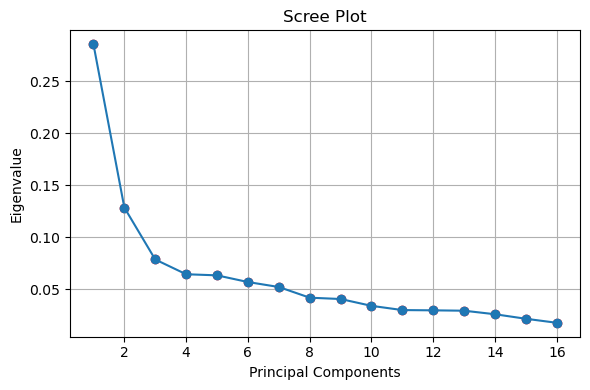

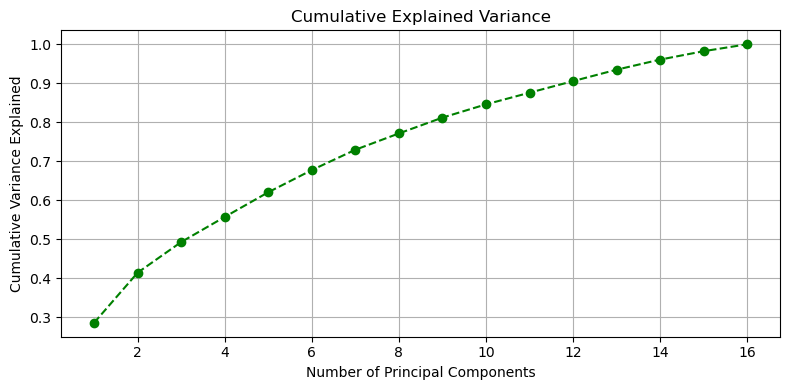

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming your dataset is in variable `df` and already preprocessed (numeric, no missing values)

# Apply PCA
pca = PCA()
pca.fit(data)

# Get Explained Variance and Cumulative Variance
explained_var = pca.explained_variance_ratio_
cumulative_var = np.cumsum(explained_var)

# Create Scree Plot
plt.figure(figsize=(6, 4))
plt.scatter(range(1, len(explained_var) + 1), explained_var, color='red')
plt.plot(range(1, len(explained_var) + 1), explained_var, marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Components')
plt.ylabel('Eigenvalue')
plt.grid(True)
plt.tight_layout()
plt.show()

# Create Cumulative Variance Plot
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(cumulative_var) + 1), cumulative_var, marker='o', linestyle='--', color='green')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.grid(True)
plt.tight_layout()
plt.show()


In [52]:
# Create Table of Variance Info
pca_table = pd.DataFrame({
    'Component': range(1, len(explained_var) + 1),
    "Eigen value":ev,
    'Explained Variance Ratio': explained_var.round(4),
    'Cumulative Variance Explained': cumulative_var.round(4)
})

print("\n📊 PCA Variance Table:")
print(pca_table.to_string(index=False))


📊 PCA Variance Table:
 Component  Eigen value  Explained Variance Ratio  Cumulative Variance Explained
         1     4.028915                    0.2856                         0.2856
         2     2.424958                    0.1285                         0.4141
         3     1.283241                    0.0786                         0.4927
         4     1.024507                    0.0644                         0.5571
         5     0.986501                    0.0633                         0.6204
         6     0.873073                    0.0569                         0.6773
         7     0.827639                    0.0521                         0.7294
         8     0.732435                    0.0419                         0.7713
         9     0.654762                    0.0406                         0.8119
        10     0.596434                    0.0340                         0.8459
        11     0.562244                    0.0299                         0.8758
     

Varience explain criteria 

In [53]:
fa = FactorAnalyzer(n_factors=8,rotation=None, method='principal')
fa.fit(data)

fa.loadings_
floading=pd.DataFrame(fa.loadings_)
floading

,0,1,2,3,4,5,6,7
0,0.545548,-0.330571,-0.220354,0.256036,-0.009421,0.223435,0.386660,-0.141987
1,0.515757,-0.340909,-0.385941,0.285509,0.337556,-0.121360,-0.192604,0.112855
2,0.573887,-0.030583,0.149663,-0.086575,-0.511780,-0.085863,0.253593,0.399033
3,0.689105,-0.187469,0.102525,-0.270604,-0.178653,-0.191627,0.206552,-0.221218
4,0.544734,-0.262339,0.299616,0.178182,-0.111635,0.454879,-0.244480,0.134788
5,0.619859,-0.289234,0.247074,0.213108,-0.084500,-0.416566,-0.042413,-0.090241
6,0.585628,-0.022751,0.199097,-0.389449,0.180670,0.374561,-0.118503,-0.175452
7,0.654488,-0.258264,0.014465,-0.313099,0.035697,0.030771,-0.237312,0.075243
8,0.655213,-0.274096,-0.183162,0.119252,0.347586,-0.109611,0.072651,0.004631
9,0.401772,0.618583,-0.225405,-0.087660,0.000196,0.175649,0.045998,0.388355


In [54]:
floading.rename(index={
    0:'Transaction speed',
       1:'Security & Fraud Protection', 2:'Cashback/Reward', 3:'Ease of use',
       4:'Transaction limits',5: '24/7 Customer Support Availability',
       6:'Payment Reminder Feature',7:'User interface & experience',
       8:'Ease of linking bank accounts',
       9:'Dependency on cash/cards',10:'Frequency of digital transactions',
       11:'Ability to track expenses',
       12:'Bill Payments & Subscription Management habits',13:'Savings habits',
       14:'Impulse buying behavior',
       15:'Payment convenience at small/local merchant'
}, inplace=True)

# Filtering loadings to show only values > 0.4, others as '-'
filtered_loadings = floading.applymap(lambda x: x if x > 0.4 or x< -0.4 else '-')
filtered_loadings


,0,1,2,3,4,5,6,7
Transaction speed,0.545548,-,-,-,-,-,-,-
Security & Fraud Protection,0.515757,-,-,-,-,-,-,-
Cashback/Reward,0.573887,-,-,-,-0.51178,-,-,-
Ease of use,0.689105,-,-,-,-,-,-,-
Transaction limits,0.544734,-,-,-,-,0.454879,-,-
24/7 Customer Support Availability,0.619859,-,-,-,-,-0.416566,-,-
Payment Reminder Feature,0.585628,-,-,-,-,-,-,-
User interface & experience,0.654488,-,-,-,-,-,-,-
Ease of linking bank accounts,0.655213,-,-,-,-,-,-,-
Dependency on cash/cards,0.401772,0.618583,-,-,-,-,-,-


#Varimax rotation

In [55]:
fa = FactorAnalyzer(n_factors=7,rotation='varimax', method='principal')
fa.fit(data)

fa.loadings_
floading=pd.DataFrame(fa.loadings_)
floading
floading.rename(index={
    0:'Transaction speed',
       1:'Security & Fraud Protection', 2:'Cashback/Reward', 3:'Ease of use',
       4:'Transaction limits',5: '24/7 Customer Support Availability',
       6:'Payment Reminder Feature',7:'User interface & experience',
       8:'Ease of linking bank accounts',
       9:'Dependency on cash/cards',10:'Frequency of digital transactions',
       11:'Ability to track expenses',
       12:'Bill Payments & Subscription Management habits',13:'Savings habits',
       14:'Impulse buying behavior',
       15:'Payment convenience at small/local merchant'
}, inplace=True)

# Filtering loadings to show only values > 0.4, others as '-'
filtered_loadings = floading.applymap(lambda x: x if x > 0.4 or x< -0.4 else '-')
filtered_loadings



,0,1,2,3,4,5,6
Transaction speed,0.512518,-,-,0.508013,-,-,-
Security & Fraud Protection,0.855989,-,-,-,-,-,-
Cashback/Reward,-,-,-,-,0.780661,-,-
Ease of use,-,-,-,-,0.720126,-,-
Transaction limits,-,-,-,-,-,0.678084,-
24/7 Customer Support Availability,0.475227,-,-,-,0.613253,-,-
Payment Reminder Feature,-,-,-,-,-,0.783826,-
User interface & experience,-,-,-,-,-,0.576472,-
Ease of linking bank accounts,0.75893,-,-,-,-,-,-
Dependency on cash/cards,-,0.53705,-,0.426576,-,-,-


In [56]:
fa = FactorAnalyzer(n_factors=8,rotation='equamax', method='principal')
fa.fit(data)

fa.loadings_
floading=pd.DataFrame(fa.loadings_)
floading
floading.rename(index={
    0:'Transaction speed',
       1:'Security & Fraud Protection', 2:'Cashback/Reward', 3:'Ease of use',
       4:'Transaction limits',5: '24/7 Customer Support Availability',
       6:'Payment Reminder Feature',7:'User interface & experience',
       8:'Ease of linking bank accounts',
       9:'Dependency on cash/cards',10:'Frequency of digital transactions',
       11:'Ability to track expenses',
       12:'Bill Payments & Subscription Management habits',13:'Savings habits',
       14:'Impulse buying behavior',
       15:'Payment convenience at small/local merchant'
},columns={
    0: 'Reliability',
    1: 'Digitalization',
    2: 'Spending',
    3: "Tracking expenses",
    4: 'Usability',
    5: "Functionality",
    6: 'convenience',
    7:  'Payments'
}, inplace=True)

# Filtering loadings to show only values > 0.4, others as '-'
filtered_loadings = floading.applymap(lambda x: x if x > 0.4 or x< -0.4 else '-')
filtered_loadings



,Reliability,Digitalization,Spending,Tracking expenses,Usability,Functionality,convenience,Payments
Transaction speed,0.526641,-,-,-,-,-,0.542786,-
Security & Fraud Protection,0.855539,-,-,-,-,-,-,-
Cashback/Reward,-,-,-,-,0.878998,-,-,-
Ease of use,-,-,-,-,0.574848,-,-,-
Transaction limits,-,-,-,-,-,0.680964,-,-
24/7 Customer Support Availability,0.56073,-,-,-,0.460344,-,-,-
Payment Reminder Feature,-,-,-,-,-,0.789118,-,-
User interface & experience,0.414355,-,-,-,-,0.541538,-,-
Ease of linking bank accounts,0.777357,-,-,-,-,-,-,-
Dependency on cash/cards,-,0.826025,-,-,-,-,-,-


In [57]:
fa.rotation_matrix_
froma=pd.DataFrame(fa.rotation_matrix_)
froma

,0,1,2,3,4,5,6,7
0,0.596771,-0.255104,0.106804,-0.172795,-0.462055,-0.472265,-0.184402,-0.258823
1,0.416374,0.631113,-0.343612,0.303994,-0.162063,-0.125832,0.207909,0.364039
2,-0.323213,0.420508,0.662091,-0.115177,-0.224424,-0.330310,0.325783,-0.038355
3,0.319326,0.133700,0.578014,0.479766,0.143305,0.329937,-0.430922,-0.028126
4,0.427619,-0.076756,0.241265,-0.427945,0.623349,-0.095929,0.252597,0.329140
5,0.278808,0.089448,0.031275,-0.225820,-0.226769,0.651047,0.474233,-0.402628
6,0.058806,-0.128041,-0.064122,0.524891,0.385590,-0.318155,0.420987,-0.522869
7,0.003416,-0.558237,0.186445,0.353053,-0.317287,0.094248,0.406212,0.504371


In [58]:
fscore = fa.transform(data)

fscore_data=pd.DataFrame(fscore)
fscore_data

,0,1,2,3,4,5,6,7
0,-1.636445,-0.663403,-0.297165,-0.211278,-1.185145,0.798898,0.375986,0.154363
1,-1.831535,-1.286326,-0.538717,2.178827,0.366549,-0.781423,2.057403,-1.072559
2,0.128886,0.714068,1.280736,-0.875764,-0.767606,1.050159,0.190897,-2.675706
3,0.068926,-0.168892,-1.329891,0.150665,1.310684,0.187486,-1.133284,-0.547083
4,0.773054,-0.002680,1.390074,-0.690957,0.708399,0.858066,0.515681,0.311197
...,...,...,...,...,...,...,...,...
417,0.717110,0.487602,-0.198936,1.433823,-1.779021,-0.305026,-1.362901,0.275331
418,-0.305508,1.302987,-1.105578,-2.585018,-0.406237,-0.130100,-0.562543,1.883965
419,0.347018,0.912191,-2.604997,0.834951,-0.762424,0.417790,1.009361,0.736042
420,0.680325,1.745987,-0.018694,0.093163,-1.141934,0.982876,-1.345509,-2.069629


In [59]:
fscore_data.rename(columns={
    0: 'Reliability',
    1: 'Digitalization',
    2: 'Spending',
    3: "Tracking expenses",
    4: 'Usability',
    5: "Functionality",
    6: 'convenience',
    7:  'Payments'
}, inplace=True)
fscore_data

,Reliability,Digitalization,Spending,Tracking expenses,Usability,Functionality,convenience,Payments
0,-1.636445,-0.663403,-0.297165,-0.211278,-1.185145,0.798898,0.375986,0.154363
1,-1.831535,-1.286326,-0.538717,2.178827,0.366549,-0.781423,2.057403,-1.072559
2,0.128886,0.714068,1.280736,-0.875764,-0.767606,1.050159,0.190897,-2.675706
3,0.068926,-0.168892,-1.329891,0.150665,1.310684,0.187486,-1.133284,-0.547083
4,0.773054,-0.002680,1.390074,-0.690957,0.708399,0.858066,0.515681,0.311197
...,...,...,...,...,...,...,...,...
417,0.717110,0.487602,-0.198936,1.433823,-1.779021,-0.305026,-1.362901,0.275331
418,-0.305508,1.302987,-1.105578,-2.585018,-0.406237,-0.130100,-0.562543,1.883965
419,0.347018,0.912191,-2.604997,0.834951,-0.762424,0.417790,1.009361,0.736042
420,0.680325,1.745987,-0.018694,0.093163,-1.141934,0.982876,-1.345509,-2.069629


In [60]:
new_data=pd.DataFrame(data=fscore_data)

In [61]:
new_data.shape

(422, 8)

In [62]:
new_data.isnull().sum()


Reliability          0
Digitalization       0
Spending             0
Tracking expenses    0
Usability            0
Functionality        0
convenience          0
Payments             0
dtype: int64

In [63]:
X1=new_data
df["recommend"]=df["Would you recommend your UPI app to others ?"].apply(lambda x: 1 if x > 8 else 0)
y1=df['recommend']

In [64]:
x1train,x1test,y1train,y1test=train_test_split(X1,y1,test_size=0.2,random_state=42)

In [65]:
log_reg1=LogisticRegression()

In [66]:
model1=log_reg1.fit(x1train,y1train)

In [67]:
ypred1=model1.predict(x1test)

In [68]:

f1_scores = cross_val_score(model1, X1, y1, cv=10, scoring='f1')

print("F1 scores for each fold:", f1_scores)
print("Average F1 score:", f1_scores.mean())


F1 scores for each fold: [0.69090909 0.75       0.83636364 0.62962963 0.77192982 0.7037037
 0.75       0.83636364 0.64150943 0.79310345]
Average F1 score: 0.7403512403769228


In [69]:
from sklearn.metrics import precision_score, recall_score
precision=precision_score(ypred1,y1test)
recall=recall_score(ypred1,y1test)
print("Precision", precision)
print("recall", recall)

Precision 0.7692307692307693
recall 0.7142857142857143


In [70]:
confusion_matrix(ypred1,y1test)

array([[17, 12],
       [16, 40]], dtype=int64)

In [71]:
coefficients = pd.DataFrame({
    'Feature': X1.columns,
    'Coefficient': model1.coef_[0],
    'Odds_Ratio': np.exp(model1.coef_[0])
})

print(coefficients.sort_values('Odds_Ratio', ascending=False))

             Feature  Coefficient  Odds_Ratio
0        Reliability     0.716356    2.046960
5      Functionality     0.520882    1.683511
3  Tracking expenses     0.386488    1.471802
1     Digitalization     0.185343    1.203631
2           Spending     0.169101    1.184240
7           Payments     0.086441    1.090287
6        convenience     0.035238    1.035867
4          Usability    -0.080792    0.922386


In [72]:
print(classification_report(y1test, ypred1))

              precision    recall  f1-score   support

           0       0.59      0.52      0.55        33
           1       0.71      0.77      0.74        52

    accuracy                           0.67        85
   macro avg       0.65      0.64      0.64        85
weighted avg       0.66      0.67      0.67        85



In [73]:
#decision tree 

In [74]:
dt=DecisionTreeClassifier(max_depth=3,random_state=42)

In [75]:
dt_model=dt.fit(x1train,y1train)

In [76]:
y_pred=dt_model.predict(x1test)

In [77]:
f1_scores = cross_val_score(dt_model, X1, y1, cv=5, scoring='f1')

print("F1 scores for each fold:", f1_scores)
print("Average F1 score:", f1_scores.mean())

F1 scores for each fold: [0.79166667 0.79245283 0.80808081 0.84684685 0.83018868]
Average F1 score: 0.8138471662056567


In [78]:
Precision1=precision_score(y1test, y_pred)
recall1=recall_score(y1test, y_pred)
print("Precision1", Precision1)
print("recall1", recall1)
print("\n Confusion Matrix:")
print(confusion_matrix(y1test, y_pred))
print("\n Classification Report:")
print(classification_report(y1test, y_pred))

Precision1 0.7419354838709677
recall1 0.8846153846153846

 Confusion Matrix:
[[17 16]
 [ 6 46]]

 Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.52      0.61        33
           1       0.74      0.88      0.81        52

    accuracy                           0.74        85
   macro avg       0.74      0.70      0.71        85
weighted avg       0.74      0.74      0.73        85



In [79]:
#Random forest 

In [80]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x1train, y1train)
yrf_pred = rf_model.predict(x1test)

print("f1_score", f1_score(y1test, yrf_pred))
print("\n Confusion Matrix:")
print(confusion_matrix(y1test, y_pred))
print("\n Classification Report:")
print(classification_report(y1test, yrf_pred))


f1_score 0.9811320754716981

 Confusion Matrix:
[[17 16]
 [ 6 46]]

 Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        33
           1       0.96      1.00      0.98        52

    accuracy                           0.98        85
   macro avg       0.98      0.97      0.97        85
weighted avg       0.98      0.98      0.98        85



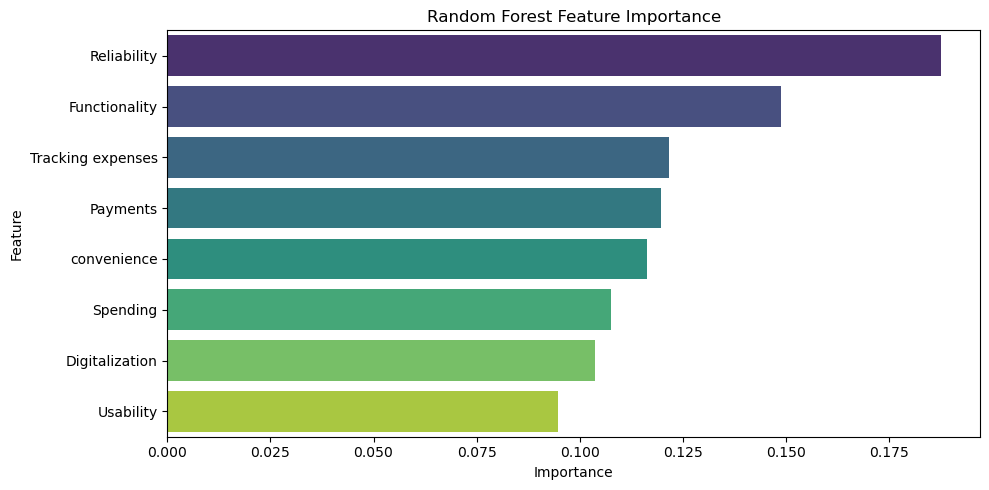

In [81]:
importances = rf_model.feature_importances_
features = X1.columns

# Create a DataFrame for plotting
feat_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x='Importance', y='Feature', data=feat_df, palette='viridis')
plt.title('Random Forest Feature Importance')
plt.tight_layout()
plt.show()


#Logistic regression satisfaction

In [82]:
X=new_data
df['Satisfaction'] =df['How satisfied are you with your primary UPI app overall ? '].apply(lambda x: 1 if x >4 else 0)
y=df['Satisfaction']

In [83]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=42)

In [84]:
log_reg=LogisticRegression()

In [85]:
model=log_reg.fit(xtrain,ytrain)

In [86]:
ypred=model.predict(xtest)

In [87]:
print(f1_score(ytest, ypred))

0.6666666666666667


In [88]:
Precision1=precision_score(ytest, ypred)
recall1=recall_score(ytest, ypred)
print("Precision1", Precision1)
print("recall1", recall1)


Precision1 0.7666666666666667
recall1 0.5897435897435898


In [89]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.71      0.85      0.77        46
           1       0.77      0.59      0.67        39

    accuracy                           0.73        85
   macro avg       0.74      0.72      0.72        85
weighted avg       0.74      0.73      0.72        85



In [90]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0],
    'Odds_Ratio': np.exp(model.coef_[0])
})

print(coefficients.sort_values('Odds_Ratio', ascending=False))

             Feature  Coefficient  Odds_Ratio
0        Reliability     0.596273    1.815340
5      Functionality     0.483773    1.622183
7           Payments     0.264791    1.303158
4          Usability     0.250747    1.284985
2           Spending     0.249850    1.283833
3  Tracking expenses     0.170305    1.185666
6        convenience     0.110539    1.116879
1     Digitalization     0.094160    1.098735


In [91]:
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(xtrain, ytrain)


DecisionTreeClassifier(max_depth=3, random_state=42)

In [92]:
y_pred = clf.predict(xtest)
f1_scores = cross_val_score(clf, X, y, cv=5, scoring='f1')

print("F1 scores for each fold:", f1_scores)
print("Average F1 score:", f1_scores.mean())

Precision1=precision_score(ytest, y_pred)
recall1=recall_score(ytest, y_pred)
print("Precision1", Precision1)
print("recall1", recall1)

F1 scores for each fold: [0.67647059 0.62337662 0.70769231 0.65753425 0.65789474]
Average F1 score: 0.6645937005443346
Precision1 0.6511627906976745
recall1 0.717948717948718


In [93]:
rf1_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf1_model.fit(xtrain, ytrain)
yrf1_pred = rf1_model.predict(xtest)

print("f1_score", f1_score(ytest, yrf1_pred))
print("\n Confusion Matrix:")
print(confusion_matrix(ytest, yrf1_pred))
print("\n Classification Report:")
print(classification_report(ytest, yrf1_pred))
Precision1=precision_score(ytest,  yrf1_pred)
recall1=recall_score(ytest,  yrf1_pred)
print("Precision1", Precision1)
print("recall1", recall1)

f1_score 0.975

 Confusion Matrix:
[[44  2]
 [ 0 39]]

 Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        46
           1       0.95      1.00      0.97        39

    accuracy                           0.98        85
   macro avg       0.98      0.98      0.98        85
weighted avg       0.98      0.98      0.98        85

Precision1 0.9512195121951219
recall1 1.0


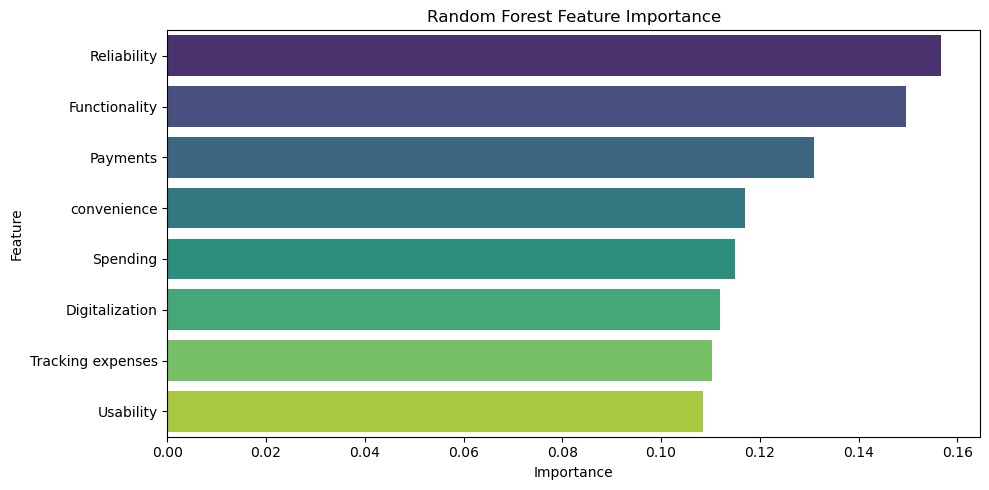

In [94]:
importances = rf1_model.feature_importances_
features = X.columns

# Create a DataFrame for plotting
feat_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x='Importance', y='Feature', data=feat_df, palette='viridis')
plt.title('Random Forest Feature Importance')
plt.tight_layout()
plt.show()
